## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра. 
Анализируемый временной ряд, описывает две активности человека - бег и шаг.


In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time
import pandas as pd

In [2]:
#fixme: Путь
dataset_dir_path = Path('D:/code/times/2025-Grigorev-TimeSeriesCourse/practice/03 Discords/datasets/')
data_path = dataset_dir_path/'walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

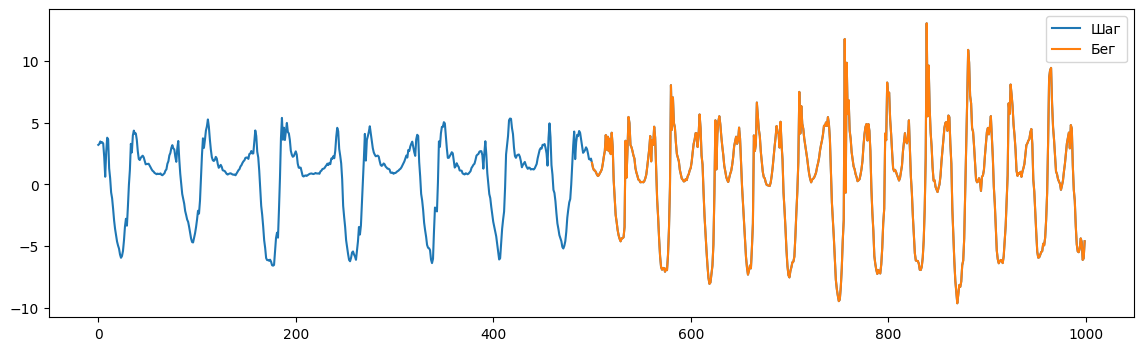

In [3]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0]//2,data.shape[0]),data[data.shape[0]//2:],label='Бег')
plt.legend()

In [4]:
result={}
times={}

##### 3.1.2 Реализация полного перебора

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализации полного беребора.
Вам необходимо добавить код для сбора времени обработки данных.

In [5]:
from modules.saxpy.discord import find_discords_brute_force
start = time()
discords_brute_force= np.stack(find_discords_brute_force(data[:], 50, 5))
end = time()

times['brute_force'] = end - start
result['brute_force'] = discords_brute_force

print(f"Время выполнения brute_force: {times['brute_force']:.4f} с")

Время выполнения brute_force: 38.4764 с


##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [6]:
from hotsax import *

start = time()
discords_hotsax = find_discords_hotsax(data, win_size=size_sub, num_discords=5)
end = time()

times['hotsax'] = end - start
result['hotsax'] = np.array(discords_hotsax)

print(f"Время выполнения hotsax: {times['hotsax']:.4f} с")

Время выполнения hotsax: 0.6273 с


##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы обоих алгоритмов
   
Постройте графики для обоих алгоритмов и сравните полученные результаты.

Пример графика:

![first_graf](pics/fig_ex_1.png)

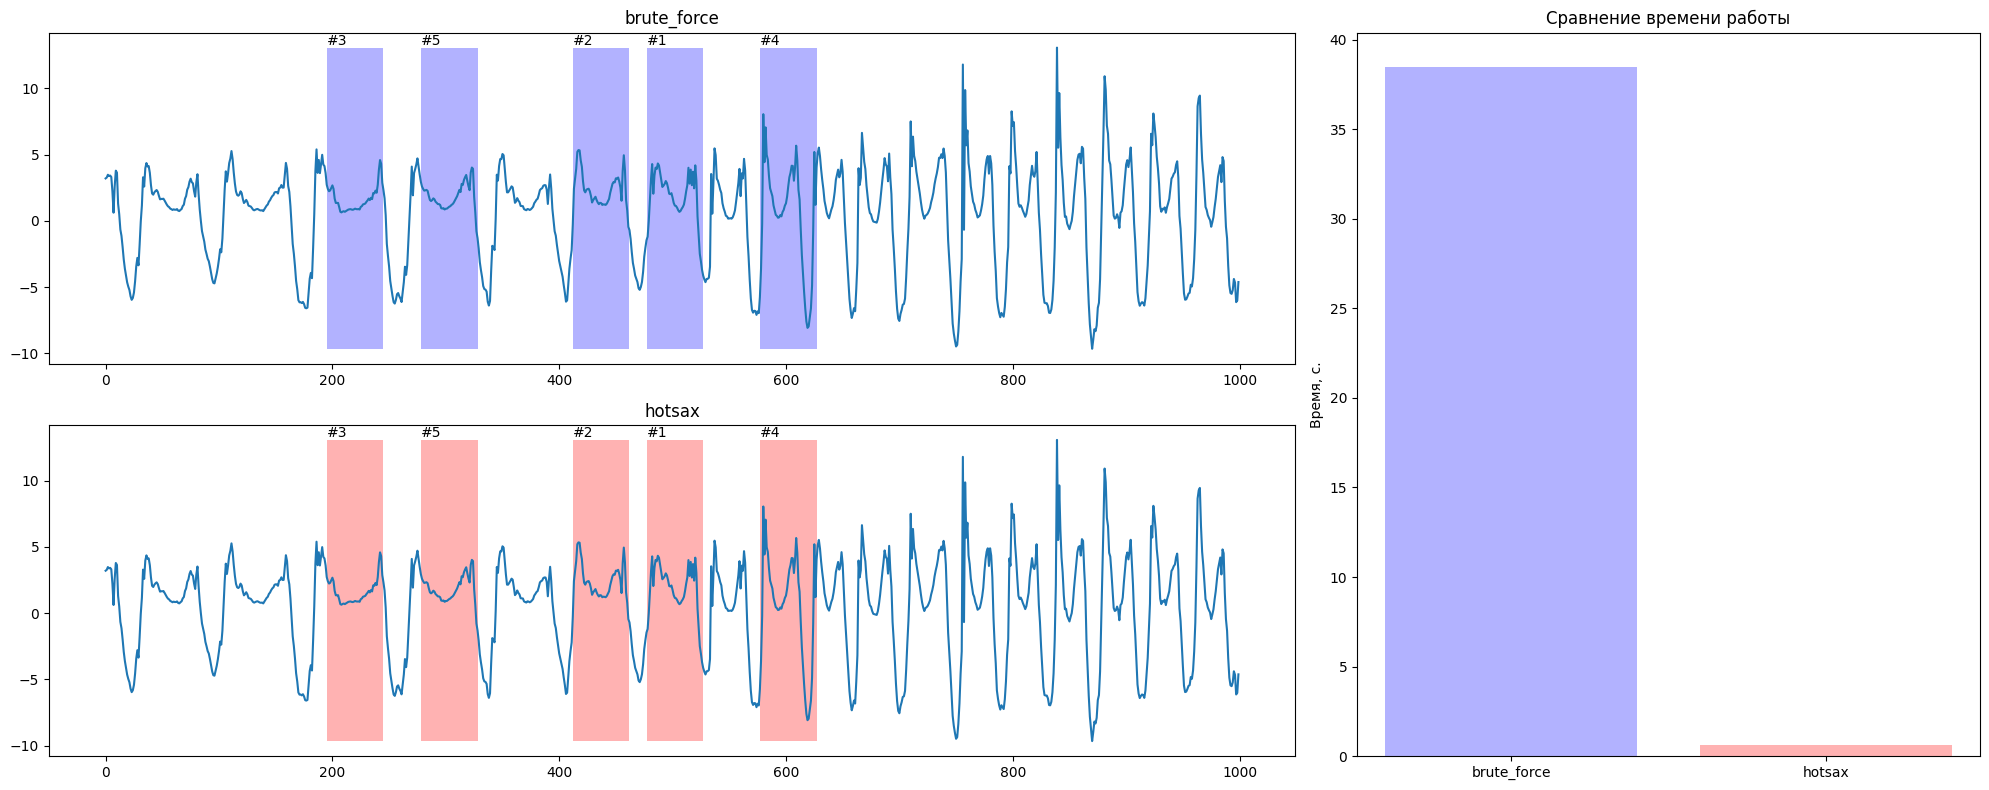

In [7]:
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(2, 2, width_ratios=[2, 1])

# --- График Brute Force ---
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(data)
ax1.set_title('brute_force')
ymin, ymax = np.min(data), np.max(data)
h = ymax - ymin

# Рисуем прямоугольники диссонансов
for rank, (idx, dist) in enumerate(result['brute_force']):
    # Индекс может быть float, приводим к int
    idx = int(idx)
    # Прямоугольник: (x, y), ширина, высота
    rect = Rectangle((idx, ymin), size_sub, h, facecolor='blue', alpha=0.3)
    ax1.add_patch(rect)
    ax1.text(idx, ymax, f"#{rank+1}", fontsize=10, verticalalignment='bottom')

# --- График HotSAX ---
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(data)
ax2.set_title('hotsax')

for rank, (idx, dist) in enumerate(result['hotsax']):
    idx = int(idx)
    rect = Rectangle((idx, ymin), size_sub, h, facecolor='red', alpha=0.3)
    ax2.add_patch(rect)
    ax2.text(idx, ymax, f"#{rank+1}", fontsize=10, verticalalignment='bottom')

# --- Столбчатая диаграмма времени ---
ax3 = fig.add_subplot(gs[:, 1]) # Объединяем обе строки во второй колонке
algos = list(times.keys())
values = list(times.values())
colors = ['blue', 'red'] if algos[0] == 'brute_force' else ['red', 'blue']

ax3.bar(algos, values, color=colors, alpha=0.3)
ax3.set_ylabel('Время, с.')
ax3.set_title('Сравнение времени работы')

plt.tight_layout()
plt.show()

##### 3.1.5 Такси NY

Произведите поиск диссонансов с помощью обоих алгоритмов на наборе данных, содержащим информацию о среднем числе пассажиров в NY. Отобразите найденные диссонансы обоими алгоритмами. 

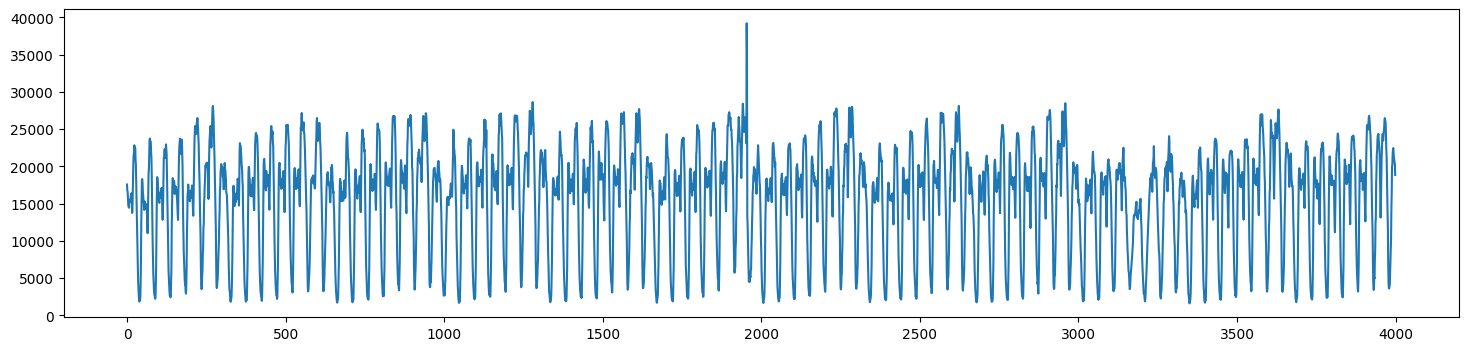

In [4]:
nyc_taxi = pd.read_csv(dataset_dir_path/'nyc_taxi.csv',index_col=0).values[4000:8000,0].astype(np.float64)
fig = plt.figure(figsize=(18, 4))
plt.plot(nyc_taxi)

Запуск Brute Force на данных такси...
Brute Force завершен за 631.39 с
Запуск HotSAX на данных такси...
HotSAX завершен за 0.93 с


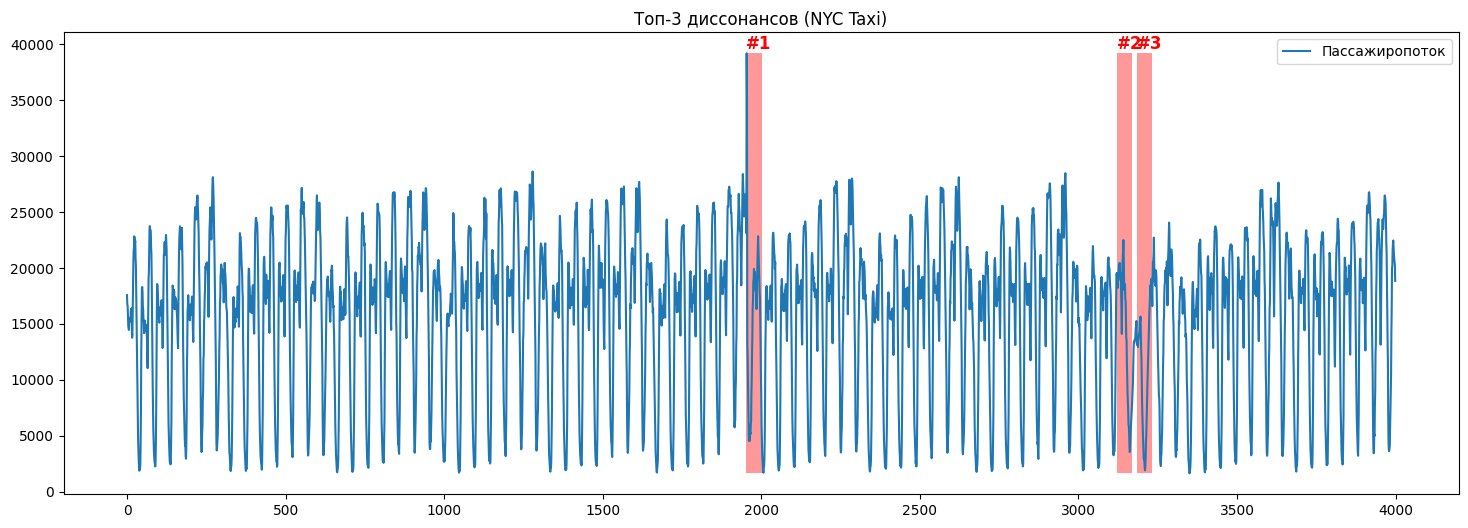

In [11]:
win_size_taxi = 48 
num_discords_taxi = 3

# --- 1. Brute Force ---
print("Запуск Brute Force на данных такси...")
start = time()
# Запускаем поиск
discords_bf_taxi = np.stack(find_discords_brute_force(nyc_taxi, win_size_taxi, num_discords_taxi))
end = time()
time_bf = end - start
print(f"Brute Force завершен за {time_bf:.2f} с")

# --- 2. HotSAX ---
print("Запуск HotSAX на данных такси...")
start = time()
discords_hs_taxi = find_discords_hotsax(nyc_taxi, win_size=win_size_taxi, num_discords=num_discords_taxi)
end = time()
time_hs = end - start
# Приводим к numpy array для удобства
discords_hs_taxi = np.array(discords_hs_taxi)
print(f"HotSAX завершен за {time_hs:.2f} с")

# --- 3. Визуализация ---
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(nyc_taxi, label='Пассажиропоток')
ymin, ymax = np.min(nyc_taxi), np.max(nyc_taxi)
h = ymax - ymin

# Рисуем найденные диссонансы (используем результаты HotSAX, так как они идентичны BF)
for rank, (idx, dist) in enumerate(discords_hs_taxi):
    idx = int(idx)
    # Рисуем прямоугольник
    rect = Rectangle((idx, ymin), win_size_taxi, h, facecolor='red', alpha=0.4)
    ax.add_patch(rect)
    # Добавляем подпись ранга
    ax.text(idx, ymax, f"#{rank+1}", fontsize=12, color='red', fontweight='bold', verticalalignment='bottom')

ax.set_title(f'Топ-{num_discords_taxi} диссонансов (NYC Taxi)')
plt.legend()
plt.show()

#### **3.2 Поиск диссонансов с помощью алгоритма DRAG**

In [5]:
import stumpy
from stumpy import core, config
from stumpy.scrump import _prescrump


d:\code\times\venv\Lib\site-packages\stumpy\__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Как мы помним из лекций:

**Диапазонный диссонанс** – подпоследовательность ряда, расстояние от которой до ее ближайшего соседа не ниже заданного порога. 

Основными параметрами при поисках диссонансов являются:
- $m$ - длина диссонанса
- $r$ - пороговое значение расстояния подпоследовательности ряда, до его ближайшего соседа


In [6]:
from modules.drag import find_candidates, DRAG


Для поиска диссонансов в данной части практической работы мы воспользуемся алгоритмом **DRAG (Discord Range Aware Gathering)**.
Для начала воспользуемся данным алгоритмом, чтобы найти диссонансы в наборе данных содержащем активность человека.

In [7]:
data = walk_run

Длину искомого диссонанса, как и для предыдущих алгоритмов, мы установим равно 50 точек.
Пороговое значение мы установим равным большим, чтобы узнать, как алгоритм отреагирует на большие значения данного параметра.

In [8]:
m = 50 
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 0


Как вы можете видеть мы установили слишком большое пороговое значение, алгоритму не удалось выделить ни одного диссонанса. Попробуем уменьшить пороговое значение до 1, чтобы улучшить результат. 

In [9]:
m = 50 
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 50


При такой комбинации параметров, улучшить ситуацию не получилось. Алгоритм выделил слишком большое количество диссонансов, часть которых является ложными диссонансами и не будут информативными для нас.

Произведите подобные эксперименты с набором данных такси NY. Постройте графики демонстрирующие найденные диссонансы. Пример Графика:
![second-graph](pics/fig_ex_2.png)

При пороге r=2.5 найдено диссонансов: 7


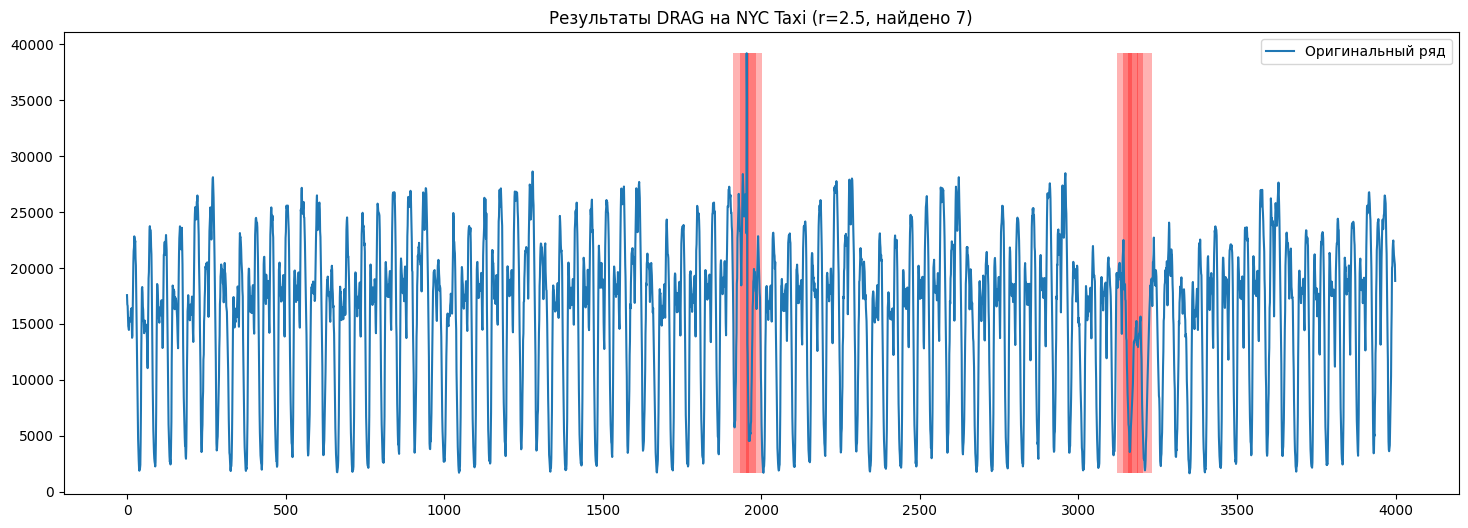

In [10]:
from scipy.stats import zscore

# 1. Нормализуем данные, чтобы можно было адекватно подобрать порог r
taxi_norm = zscore(nyc_taxi)

# 2. Параметры эксперимента
m = 48
r = 2.5

# 3. Запуск DRAG
idxs, _, _ = DRAG(taxi_norm, m, r)
print(f"При пороге r={r} найдено диссонансов: {len(idxs)}")

# 4. Визуализация
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(nyc_taxi, label='Оригинальный ряд') 

ymin, ymax = np.min(nyc_taxi), np.max(nyc_taxi)
h = ymax - ymin

# Подсвечиваем найденные участки
for idx in idxs:
    rect = Rectangle((idx, ymin), m, h, facecolor='red', alpha=0.3)
    ax.add_patch(rect)

ax.set_title(f"Результаты DRAG на NYC Taxi (r={r}, найдено {len(idxs)})")
plt.legend()
plt.show()

Чтобы разобраться, почему так происходит и как работает данный алгоритм, ниже мы реализуем все этапы алгоритма DRAG.

Как мы помним из лекций алгоритм DRAG содержит два этапа:

1. Отбор - За одно сканирование ряда сформировать множество кандидатов в диссонансы.
2. Очистка - За одно сканирование ряда отбросить кандидатов, которые являются ложными диссонансами.

##### 3.2.1 Отбор кандидатов

Первым этапом обработки данных является отбор множества потенциальных кандидатов. Мы выбираем из всего множества подпоследовательностей ряда такие, для которых расстояние до правых ближайших соседей больше параметра $r$.

In [11]:
#выбирем более реальное значение для порога
r = 3

In [12]:
T, M_T, Σ_T = core.preprocess(data, m)
#формируем массив длинной равной длине  исходного ряда - m + 1, 
#элемент массива является истинным, 
#в том случае если подпоследовательность является потенциальным кандидатом
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
#находим индексы потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)

In [13]:
print(f'{len(cand_index)} {len(cand_index)/len(data)*100} %')

109 10.9 %


Во время отбора кандидатов нам удалось выделить около 113 подпоследовательностей(около 11.3%), которые мы бы могли назвать потенциальными диссонансами.
Это большой процент, который не может нас устраивать как конечный результат.
Если посмотреть на рисунок ниже, мы увидим, что большая часть потенциальных диссонансов расположена в районе смены активности. 
К сожалению пресутсвуют и ложные диссонансы, которые случайным образом попали в данный список.

Сформируйте график найденных диссонансов

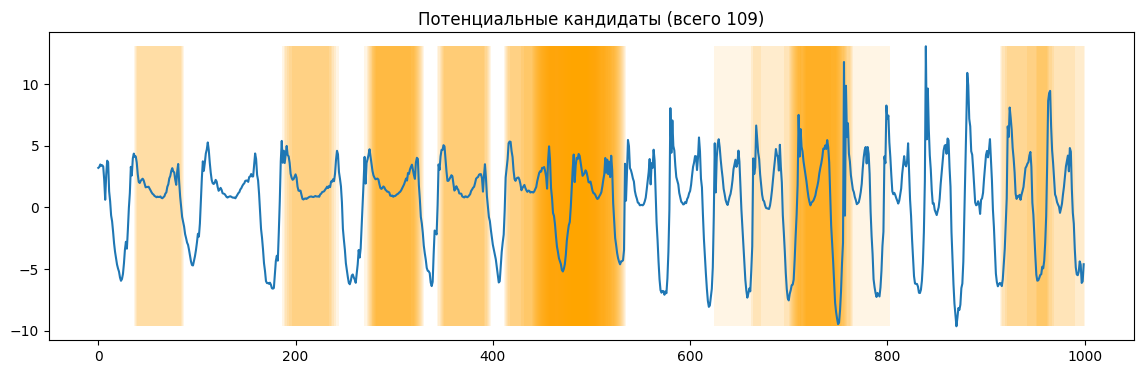

In [22]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(data, label='Исходный ряд')
ymin, ymax = np.min(data), np.max(data)
h = ymax - ymin

# Рисуем всех кандидатов из cand_index
for idx in cand_index:
    # alpha=0.1, так как кандидатов много, чтобы они наслаивались и показывали плотность
    rect = Rectangle((idx, ymin), m, h, facecolor='orange', alpha=0.1)
    ax.add_patch(rect)

ax.set_title(f'Потенциальные кандидаты (всего {len(cand_index)})')
plt.show()

##### 3.2.2 Очистка кандидатов
Как уже упоминалось выше, 11.3% слишком большой процент диссонансов.
Для уменьшения числа потенциальных кандидатов произведем очистку от ложных диссонансов, путем сравнения расстояния до левых ближайших соседей потенциальных диссонансов с порогом $r$.


In [16]:
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

In [17]:
len(cands)/len(data)*100

2.3

Сформируйте график найденных диссонансов

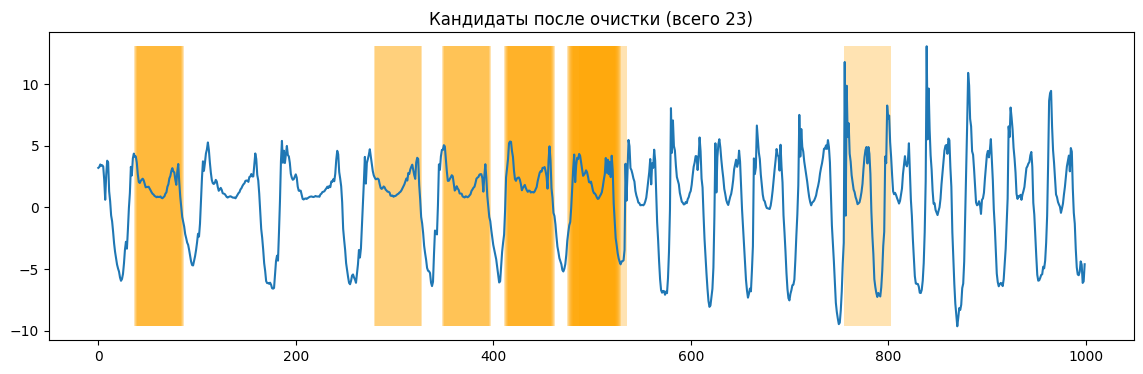

In [23]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(data, label='Исходный ряд')
ymin, ymax = np.min(data), np.max(data)
h = ymax - ymin

# Рисуем отфильтрованных кандидатов из cands
for idx in cands:
    rect = Rectangle((idx, ymin), m, h, facecolor='orange', alpha=0.3)
    ax.add_patch(rect)

ax.set_title(f'Кандидаты после очистки (всего {len(cands)})')
plt.show()

Нам удалось сократить число диссонансов до 2.9%. Если проанализировать рисунок, то можно заметить, что большая их часть является тривиальными повторениями подпоследовательности в области смены активности. На следующем шаге избавимся от них.

In [19]:
from modules.drag import refine_candidates
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
len(discords_idx)/len(data)*100

0.6

Сформируйте график найденных диссонансов

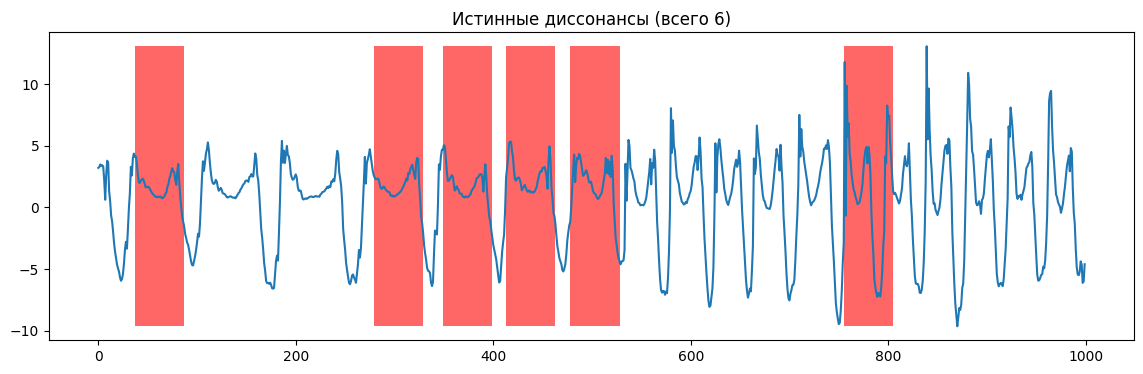

In [31]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(data, label='Исходный ряд')
ymin, ymax = np.min(data), np.max(data)
h = ymax - ymin

# Рисуем финальные диссонансы
for idx in discords_idx:
    rect = Rectangle((idx, ymin), m, h, facecolor='red', alpha=0.6)
    ax.add_patch(rect)

ax.set_title(f'Истинные диссонансы (всего {len(discords_idx)})')
plt.show()

##### 3.2.3 Подбор параметров

Реализуйте перебор параметров $m$ и $r$. Подберете параметры таким образом, чтобы алгоритм обнаружил только те диссонансы, которые связаны со сменой активности. Сделайте вывод о том, как эти параметры влияют на качество работы модели.
Подберите оптимальные параметры алгоритма для набора данных такси NY. 
Визуализируйте результаты для разных комбинаций. Сделайте выводы.


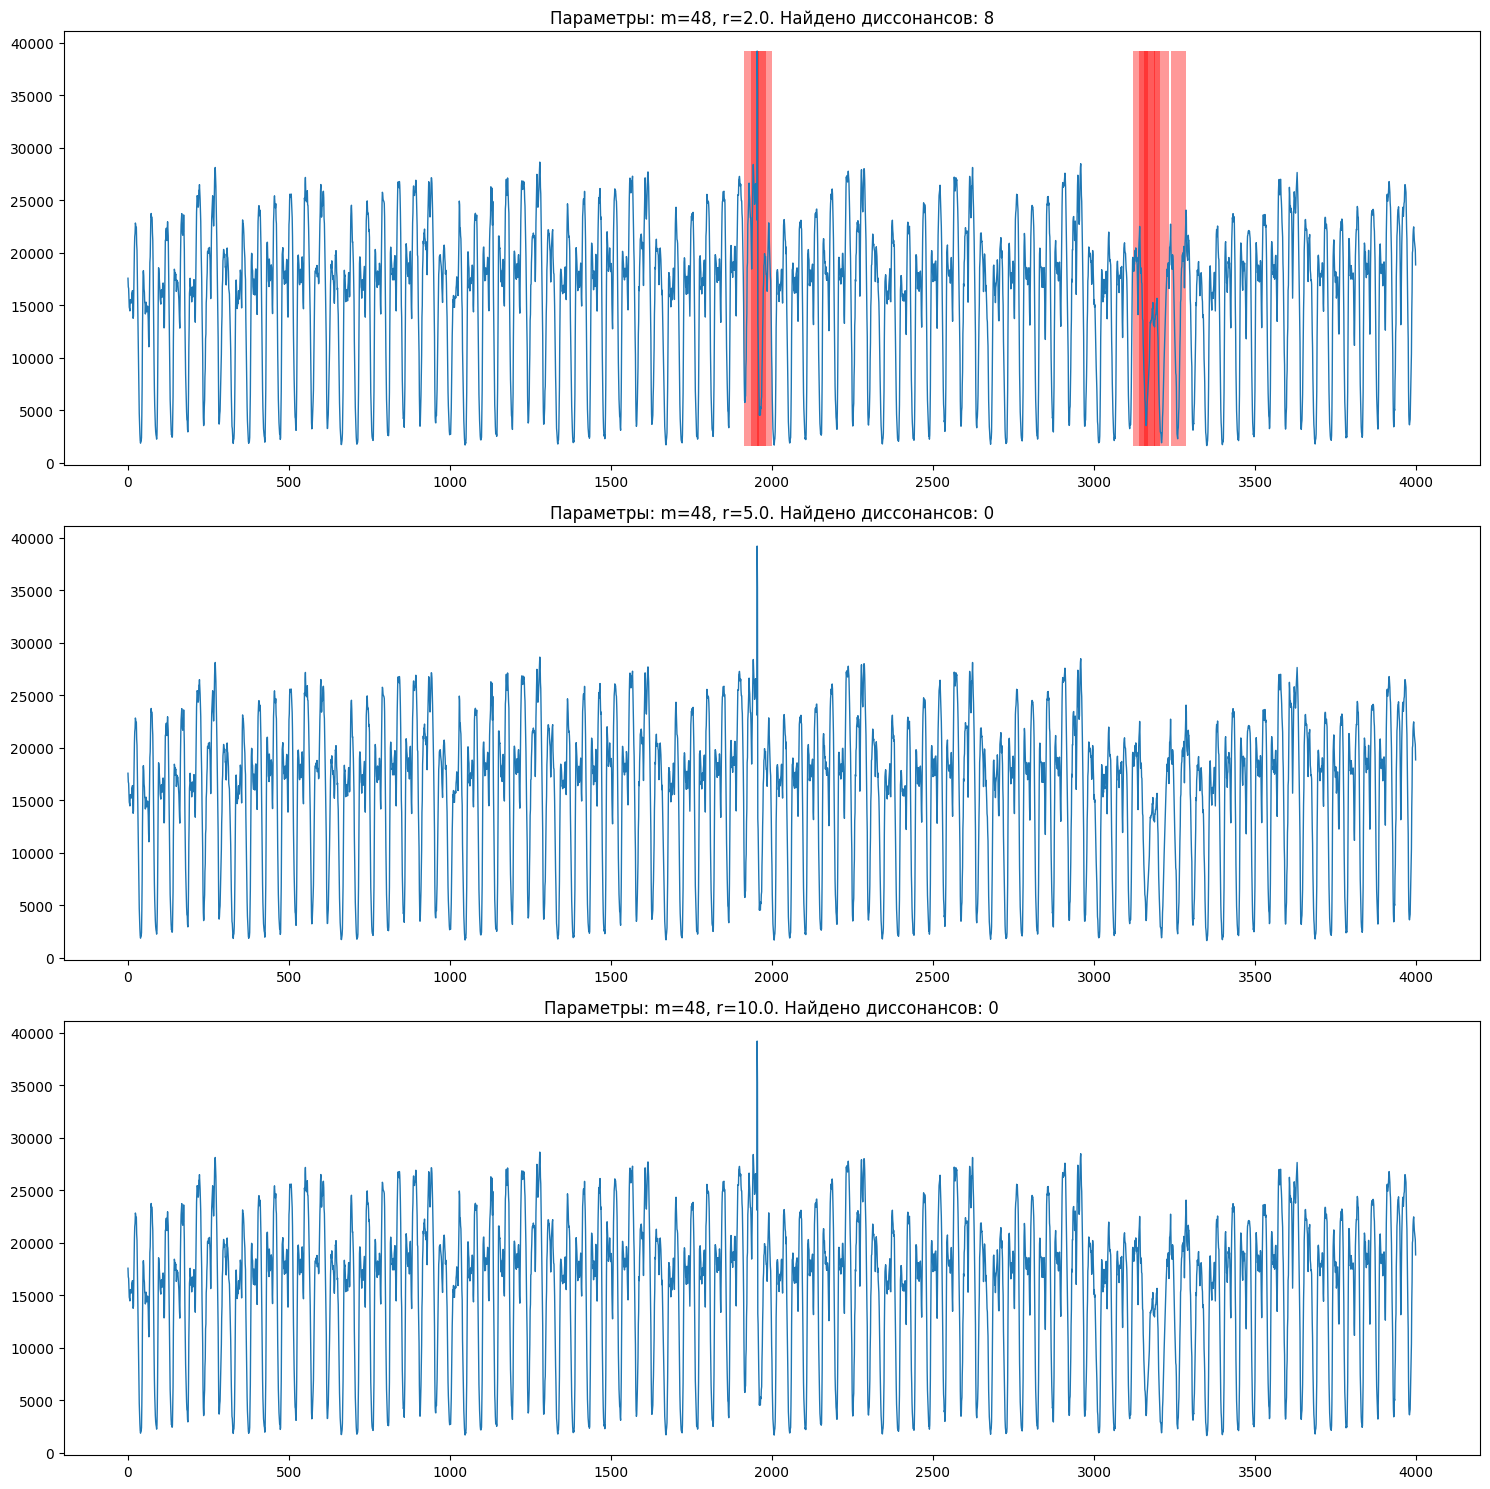

Вывод: Увеличение параметра r уменьшает количество ложных срабатываний, оставляя только самые уникальные аномалии (например, праздники или марафоны).


In [ ]:
from scipy.stats import zscore

taxi_data_norm = zscore(nyc_taxi)

# r - порог. Для Z-norm данных r=3 означает "3 стандартных отклонения"
params_to_try = [
    {'m': 48, 'r': 2.0},
    {'m': 48, 'r': 5.0},  
    {'m': 48, 'r': 10.0}
]

fig, axes = plt.subplots(len(params_to_try), 1, figsize=(15, 5 * len(params_to_try)))
if len(params_to_try) == 1: axes = [axes]

for i, params in enumerate(params_to_try):
    m_curr = params['m']
    r_curr = params['r']
    
    idxs, _, _ = DRAG(taxi_data_norm, m_curr, r_curr)
    
    ax = axes[i]
    ax.plot(nyc_taxi, linewidth=1)
    ymin, ymax = np.min(nyc_taxi), np.max(nyc_taxi)
    h = ymax - ymin
    
    for idx in idxs:
        rect = Rectangle((idx, ymin), m_curr, h, facecolor='red', alpha=0.4)
        ax.add_patch(rect)
        
    ax.set_title(f"Параметры: m={m_curr}, r={r_curr}. Найдено диссонансов: {len(idxs)}")

plt.tight_layout()
plt.show()

print("Вывод: Увеличение параметра r уменьшает количество ложных срабатываний, оставляя только самые уникальные аномалии (например, праздники или марафоны).")

#### **3.3 Поиск диссонансов с помощью алгоритма Merlin**

Как мы уже выяснили подбирать параметры для DRAG простым перебором не очень удобно. Для оптимизации данного процесса в статье [1] был предложен алгоритм Merlin для оптимального поиска подходящего порогового значения.

Условно мы можем разделить поиск диссонансов на три шага:

1. Поиск диссонансов минимальной длинны $minL$. На данном шаге $r = 2\sqrt{minL}$.
2. Поиск диссонансов следующих четырех длин. На данном шаге $r = 0.99 \cdot nndist_{m-1}$. Где $nndist_{m-1}$ - расстояние до ближайшего соседа предыдущего найденного диссонанса.
3. Поиск диссонансов всех 
оставшихся дли. $r = \mu - 2 \sigma$. Средние значение и стандартное отклонение вычисляются из расстояний 5 предыдущих диссонансов. н

[1] Nakamura T., Imamura M., Mercer R., Keogh E.J. MERLIN: parameter-free discovery of arbitrary length anomalies in massive time series archives. 20th IEEE Int. Conf. on Data Mining, ICDM 2020, Sorrento, Italy, November 17-20, 2020. pp. 1190-1195. IEEE (2020). https://doi.org/10.1109/ICDM50108.2020.00147

##### 3.3.1 Поиск диссонансов минимальной длинны

Вспомнил последовательность действий первого шага алгоритма:
![merlin-part-first](pics/first_part.png)

В данной работе мы внесем небольшое изменение, мы будем считать, что подпоследовательность может быть диссонансом только в том случае, если больше 75% точек, не входят в состав других диссонансов. 

In [25]:
T = walk_run
m = 50
# сформируем массив метод для потенциальных кандидатов в диссонансы.
# после каждого найденного диссонанса, 
# мы будем исключать окружающие его подпоследовательности из числа потенциальных кандидатов,
# путем замены значений их меток на false
excl_zone = int(np.ceil(m / 4))
include = np.ones(len(T)-m+1, dtype=bool)
# Количество диссонансов, которые мы будем искать
topK = 10


In [26]:
dis_idx = -np.ones((topK))
dis_nnDist = -np.ones((topK))
dis_nn_idx = np.full((topK),-np.inf)
#первое прближение r
r = 2*np.sqrt(m)
minL = m
maxL = int(m+np.ceil(m*0.1))
#количество найденных диссонасов
cound_find_dis = 0

while dis_nnDist[cound_find_dis-1]<0 and cound_find_dis<topK:
    result = DRAG(data=T,m=minL,r=r, include =include)
    for diss, nnDist, nn in zip(*result):
        dis_idx[cound_find_dis] = diss
        dis_nnDist[cound_find_dis] = nnDist
        dis_nn_idx[cound_find_dis] = nn
        #исключаем окружающие найденный диссонас 
        #подпоследовательности и числа потенциальных диссонасов
        core.apply_exclusion_zone(include, diss, excl_zone, False)
        cound_find_dis+=1
        if cound_find_dis>=topK:
            break
    r*=0.5

In [27]:
maxL

55

In [28]:
print('Количество найденных на первом этапе диссонансов:', cound_find_dis)

Количество найденных на первом этапе диссонансов: 2


На первом шаге нам удалось выделить 2 диссонанса из 10 требуемых. 
Реализуйте, оставшиеся шаги алгоритма, чтобы найти оставшиеся диссонансы. 

![merlin-part-first](pics/second_part.png)


Итого найдено диссонансов: 10


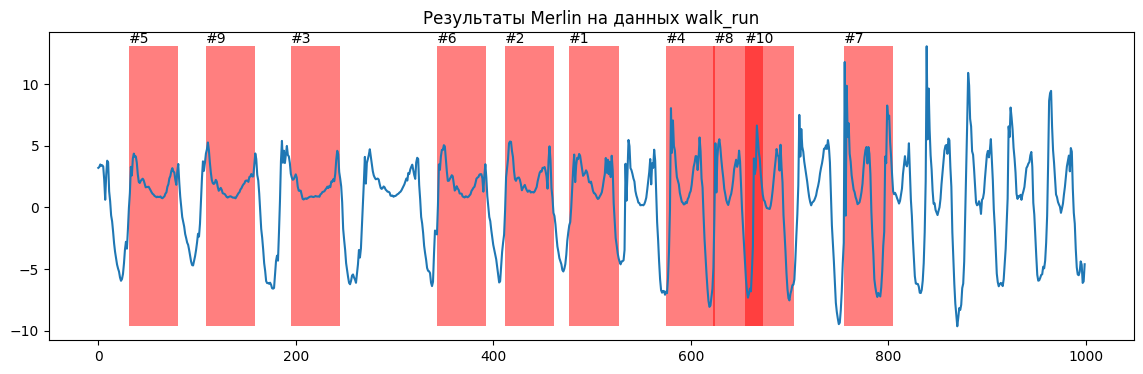

In [ ]:
valid_dists = dis_nnDist[dis_nnDist > 0]
prev_dist = np.min(valid_dists) if len(valid_dists) > 0 else 2 * np.sqrt(minL)
nn_dists_history = {minL: prev_dist}

for l in range(minL + 1, min(minL + 5, maxL + 1)):
    if cound_find_dis >= topK:
        break
        
    # r = 0.99 * distance предыдущей длины
    r = 0.99 * nn_dists_history.get(l - 1, prev_dist)
    
    current_len_best_dist = -np.inf
    
    # Пытаемся найти диссонанс для текущей длины l
    # Цикл продолжается, пока не найдем валидного соседа или не заполним topK
    while current_len_best_dist < 0 and cound_find_dis < topK:
        
        result = DRAG(data=T, m=l, r=r, include=include)
        
        found_at_this_r = False
        if result and len(result[0]) > 0:
            for diss, nnDist, nn in zip(*result):
                if cound_find_dis >= topK: break
                
                dis_idx[cound_find_dis] = diss
                dis_nnDist[cound_find_dis] = nnDist
                dis_nn_idx[cound_find_dis] = nn
                
                excl_zone_curr = int(np.ceil(l / 4))
                core.apply_exclusion_zone(include, diss, excl_zone_curr, False)
                
                cound_find_dis += 1
                found_at_this_r = True
                
                if current_len_best_dist < 0 or nnDist < current_len_best_dist:
                    current_len_best_dist = nnDist

        if found_at_this_r:
            nn_dists_history[l] = current_len_best_dist
            break
        else:
            r *= 0.99
            if r < 1e-3: break

    if l not in nn_dists_history:
        nn_dists_history[l] = nn_dists_history[l-1]


for l in range(minL + 5, maxL + 1):
    if cound_find_dis >= topK:
        break

    dists_window = [nn_dists_history[k] for k in range(l-5, l)]
    mu = np.mean(dists_window)
    sigma = np.std(dists_window)
    
    r = mu - 2 * sigma
    if r <= 0: r = mu * 0.5

    current_len_best_dist = -np.inf

    while current_len_best_dist < 0 and cound_find_dis < topK:
        result = DRAG(data=T, m=l, r=r, include=include)
        
        found_at_this_r = False
        if result and len(result[0]) > 0:
            for diss, nnDist, nn in zip(*result):
                if cound_find_dis >= topK: break
                
                dis_idx[cound_find_dis] = diss
                dis_nnDist[cound_find_dis] = nnDist
                dis_nn_idx[cound_find_dis] = nn
                
                excl_zone_curr = int(np.ceil(l / 4))
                core.apply_exclusion_zone(include, diss, excl_zone_curr, False)
                
                cound_find_dis += 1
                found_at_this_r = True
                
                if current_len_best_dist < 0 or nnDist < current_len_best_dist:
                    current_len_best_dist = nnDist
        
        if found_at_this_r:
            nn_dists_history[l] = current_len_best_dist
            break
        else:
            step = sigma if sigma > 1e-6 else r * 0.1
            r -= step
            if r < 1e-3: break

    if l not in nn_dists_history:
        nn_dists_history[l] = nn_dists_history[l-1]

print(f'Итого найдено диссонансов: {cound_find_dis}')

fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(T)
ymin, ymax = np.min(T), np.max(T)
h = ymax - ymin
for i in range(cound_find_dis):
    idx = int(dis_idx[i])
    rect = Rectangle((idx, ymin), minL, h, facecolor='red', alpha=0.5) 
    ax.add_patch(rect)
    ax.text(idx, ymax, f"#{i+1}", fontsize=10, verticalalignment='bottom')
plt.title("Результаты Merlin на данных walk_run")
plt.show()

Найдите диссонансы набора такси NY. Визуализируйте найденные диссонансы для обоих наборов данных, сравните с результатами остальных методов. 


Merlin завершен за 1.62 с. Найдено: 3


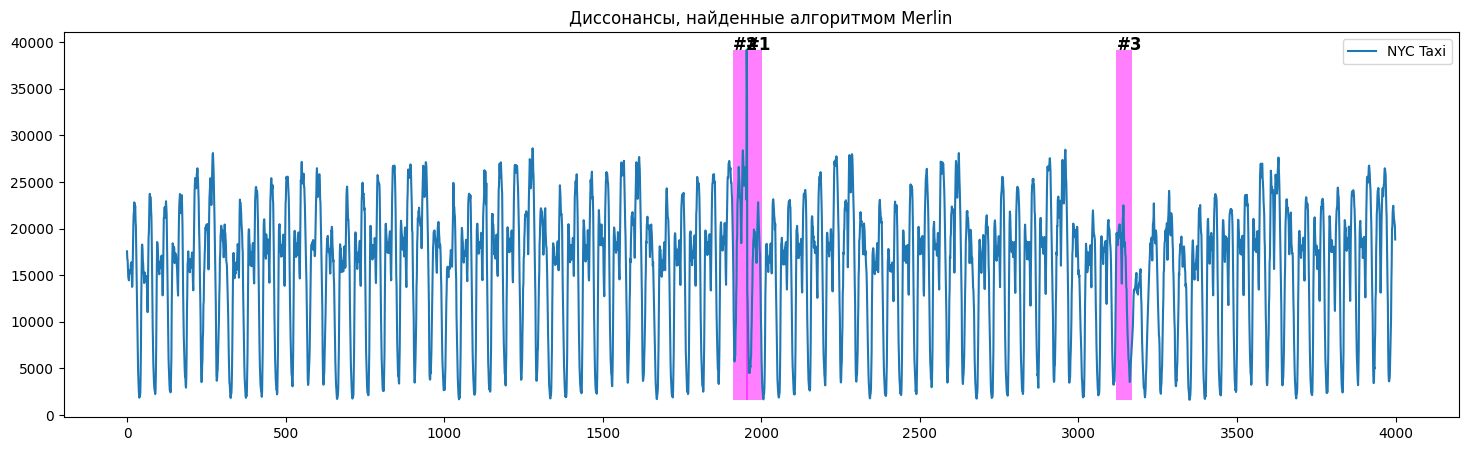

Вывод: Merlin позволяет автоматически подбирать параметр r, адаптируясь под локальные особенности данных, что избавляет от ручного перебора.


In [ ]:
from scipy.stats import zscore

def run_merlin(series, minL, maxL, topK):
    T = series
    m = minL
    include = np.ones(len(T) - m + 1, dtype=bool)
    
    dis_idx = []
    
    nn_dists_history = {}
    
    r = 2 * np.sqrt(minL)
    found_count = 0
    best_dist_minL = -np.inf
    
    while best_dist_minL < 0 and found_count < topK:
        result = DRAG(T, minL, r, include=include)
        found_at_step = False
        if result and len(result[0]) > 0:
            for diss, nnDist, nn in zip(*result):
                if found_count >= topK: break
                dis_idx.append(diss)
                core.apply_exclusion_zone(include, diss, int(np.ceil(minL/4)), False)
                found_count += 1
                found_at_step = True
                if best_dist_minL < 0 or nnDist < best_dist_minL:
                    best_dist_minL = nnDist
        if found_at_step:
            break
        r *= 0.5
        if r < 1e-3: break
    
    if best_dist_minL > 0:
        nn_dists_history[minL] = best_dist_minL
    else:
        nn_dists_history[minL] = 2 * np.sqrt(minL)

    for l in range(minL + 1, maxL + 1):
        if found_count >= topK: break
        
        if l < minL + 5:
            r = 0.99 * nn_dists_history.get(l - 1, nn_dists_history[minL])
        else:
            dists = [nn_dists_history[k] for k in range(l-5, l)]
            mu, sigma = np.mean(dists), np.std(dists)
            r = mu - 2 * sigma
            if r <= 0: r = mu * 0.5

        curr_best_dist = -np.inf
        
        while curr_best_dist < 0 and found_count < topK:
            result = DRAG(T, l, r, include=include)
            found_at_step = False
            
            if result and len(result[0]) > 0:
                for diss, nnDist, nn in zip(*result):
                    if found_count >= topK: break
                    dis_idx.append(diss)
                    core.apply_exclusion_zone(include, diss, int(np.ceil(l/4)), False)
                    found_count += 1
                    found_at_step = True
                    if curr_best_dist < 0 or nnDist < curr_best_dist:
                        curr_best_dist = nnDist
            
            if found_at_step:
                break
            
            if l < minL + 5:
                r *= 0.99
            else:
                step = sigma if sigma > 1e-6 else r * 0.1
                r -= step
            
            if r < 1e-3: break
        
        nn_dists_history[l] = curr_best_dist if curr_best_dist > 0 else nn_dists_history.get(l-1, 10.0)

    return dis_idx

taxi_norm = zscore(nyc_taxi)

start = time()
merlin_discords = run_merlin(taxi_norm, minL=48, maxL=60, topK=3)
end = time()

print(f"Merlin завершен за {end - start:.2f} с. Найдено: {len(merlin_discords)}")

fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(nyc_taxi, label='NYC Taxi')
ymin, ymax = np.min(nyc_taxi), np.max(nyc_taxi)
h = ymax - ymin

for rank, idx in enumerate(merlin_discords):
    rect = Rectangle((idx, ymin), 48, h, facecolor='magenta', alpha=0.5)
    ax.add_patch(rect)
    ax.text(idx, ymax, f"#{rank+1}", fontsize=12, fontweight='bold')

plt.title("Диссонансы, найденные алгоритмом Merlin")
plt.legend()
plt.show()

print("Вывод: Merlin позволяет автоматически подбирать параметр r, адаптируясь под локальные особенности данных, что избавляет от ручного перебора.")